In [1]:
# numpy, simplifid form of numerical python, is a library for working with arrays of data
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# ndarray, a fast, flexible container for large datasets in Python
my_arr= np.arange(1_000_000)
my_list= list(range(1_000_000))
my_arr
my_list
np.array(my_list)
np.array(my_arr)

In [ ]:
%timeit for _ in range(10): my_arr2= my_arr*2 #element-wise multiplication, i.e., vectorization
%timeit for _ in range(10): my_list2= [x*2 for x in my_list]

25.9 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
606 ms ± 36.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
data= np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [ ]:
data * 10
data+data
data > data

array([[-2.0471,  4.7894, -5.1944],
       [-5.5573, 19.6578, 13.9341]])

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

array([[False, False, False],
       [False, False, False]])

In [7]:
data.shape
data.dtype

(2, 3)

dtype('float64')

In [52]:
data.mean(axis=0) #mean of columns
data.mean(axis=1) #mean of rows
# broadcasting, a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes
demeaned= data - data.mean(axis=0)
demeaned.mean(axis=0)
demeaned.mean(axis=1)
# demeaned2= data - data.mean(axis=1) #error
demeaned2= data - data.mean(axis=1).reshape((2, -1))
demeaned2.mean(axis=0)
demeaned2.mean(axis=1)

array([-0.3802,  1.2224,  0.437 ])

array([-0.0817,  0.9345])

array([-0.,  0.,  0.])

array([-0.5081,  0.5081])

array([-0.8066,  0.796 ,  0.0106])

array([ 0., -0.])

In [54]:
arr= np.zeros((2, 3))
arr_3d= arr[:, np.newaxis, :] #newaxis, a special syntax that allows us to insert a new axis into an array
arr_3d.shape
arr_3d

(2, 1, 3)

array([[[0., 0., 0.]],

       [[0., 0., 0.]]])

In [55]:
arr_1d= np.random.normal(size=3)
arr_1d
arr_1d[:, np.newaxis]
arr_1d[np.newaxis, :]

array([0.0929, 0.2817, 0.769 ])

array([[0.0929],
       [0.2817],
       [0.769 ]])

array([[0.0929, 0.2817, 0.769 ]])

In [79]:
from hmac import new


arr= np.random.randn(3, 4, 5)
axis2_mean= arr.mean(axis=2)
axis2_mean
axis2_mean.shape
new_arr= arr- axis2_mean[:, :, np.newaxis]
new_arr
new_arr.shape
new_arr.mean(axis=2)

array([[-0.1293,  0.0989,  0.1087, -1.1086],
       [ 0.5361,  0.4629, -0.6038,  0.4993],
       [-0.4068, -0.7641, -0.2069,  0.1584]])

(3, 4)

array([[[-0.1601, -0.605 , -0.5992,  0.9681,  0.3962],
        [ 0.6223,  0.8121, -1.1198, -1.5123,  1.1977],
        [ 0.1436,  1.0188, -0.677 ,  0.2007, -0.6861],
        [-0.06  ,  0.2836, -1.5358,  0.9556,  0.3567]],

       [[-0.6687,  0.9212,  0.0734, -1.0299,  0.7039],
        [-0.5986,  0.9672, -1.3097,  0.1404,  0.8007],
        [ 0.3483,  0.1581,  1.0722, -0.3578, -1.2207],
        [ 0.1261,  0.5236,  0.6081, -0.4084, -0.8494]],

       [[ 0.6248, -0.488 , -1.3347, -0.6455,  1.8434],
        [ 0.1879, -1.6562, -0.2982,  1.0015,  0.7651],
        [ 0.2722, -1.1606,  0.1766,  1.1474, -0.4355],
        [ 0.8818, -1.2413,  0.2708, -0.3946,  0.4834]]])

(3, 4, 5)

array([[-0., -0.,  0., -0.],
       [-0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.]])

In [74]:
list= [slice(None)]*2
list
arr= np.array(list)
arr.shape #slice(None) is equivalent to a full slice [:]
list[0]= np.newaxis
list

[slice(None, None, None), slice(None, None, None)]

(2,)

[None, slice(None, None, None)]

In [ ]:
def demean_axis(arr, axis=0):
    means= arr.mean(axis)
    indexer= [slice(None)]*arr.ndim
    indexer[axis]= np.newaxis
    return arr- means[tuple(indexer)] #tuple(indexer) converts the list to a tuple

demean_axis(arr, axis=2).mean(2)

array([[-0., -0.,  0., -0.],
       [-0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.]])

In [84]:
arr= np.zeros((4, 3))
arr[:]= 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [ ]:
col= np.array([1.28, -0.42, 0.44, 1.6])
col.shape
arr[:] = col[:, np.newaxis]
arr
arr[:2]= [[-1.37], [0.509]]
arr

(4,)

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

In [76]:
data2= [[1, 2, 3], [4, 5, 6]]
arr2= np.array(data2)
arr2

array([[1, 2, 3],
       [4, 5, 6]])

In [77]:
arr2.ndim
arr2.shape
arr2.dtype

2

(2, 3)

dtype('int64')

In [ ]:
np.zeros(10)
np.zeros((3,6))
np.empty((2,3,2)) # empty creates an array without initializing its values to any particular value, it may return garbage values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[[ 8.4815e-312,  3.1620e-322],
        [ 0.0000e+000,  0.0000e+000],
        [-4.9479e+096,  4.6955e-033]],

       [[ 4.3220e-037,  1.5629e+185],
        [ 4.8147e-038,  4.0861e-033],
        [ 8.6140e-067,  3.2647e-032]]])

In [ ]:
np.array((1, 2, 3, 4, 5))
arr1= np.array([1, 2, 3], dtype= np.float64)
arr2= np.array([1, 2, 3], dtype= np.int32)
arr1.dtype
arr2.dtype
arr1
arr2

dtype('float64')

dtype('int32')

In [16]:
arr= np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr= arr.astype(np.float64)
float_arr.dtype

dtype('int64')

dtype('float64')

In [17]:
arr= np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [20]:
numeric_strings= np.array(['1.25', '-9.6', '42'], dtype= np.bytes_)
numeric_strings.astype(np.float64)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

array([ 1.25, -9.6 , 42.  ])

In [22]:
int_array= np.arange(10)
calibers= np.array([.22, .270, .357, .380, .44, .50], dtype= np.float64)
int_array.astype(calibers.dtype).dtype

dtype('float64')

In [23]:
np.empty(8, dtype= 'u4').dtype

dtype('uint32')

In [24]:
ints= np.ones(10, dtype= np.uint16)
floats= np.ones(10, dtype= np.float32)
np.issubdtype(ints.dtype, np.integer)
np.issubdtype(floats.dtype, np.floating)

True

True

In [25]:
# use mro to check the inheritance of the data type
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [26]:
np.issubdtype(ints.dtype, np.number)

True

In [27]:
np.bytes_.mro()

[numpy.bytes_, bytes, numpy.character, numpy.flexible, numpy.generic, object]

In [28]:
np.ones((3,4,5), dtype= np.float64).strides

(160, 40, 8)

In [33]:
np.dtype(np.float64).itemsize
np.dtype(np.float16).itemsize

8

2

In [42]:
arr= np.arange(8)
arr
arr.shape
arr.reshape((4, 2))
arr.reshape((4, 2), order= 'F')
arr.reshape((4, 2)).reshape((2, 4))
arr.reshape((2, 4)).reshape((-1, 8))
tuple_shape= (4, 2)
arr.reshape(tuple_shape)
# raveal is a function that returns a flattened array
arr.reshape(tuple_shape).ravel()
arr.reshape(tuple_shape).ravel('F')
arr.reshape(tuple_shape).flatten()
arr.reshape(tuple_shape).flatten('F')

array([0, 1, 2, 3, 4, 5, 6, 7])

(8,)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

array([[0, 1, 2, 3, 4, 5, 6, 7]])

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

array([0, 1, 2, 3, 4, 5, 6, 7])

array([0, 2, 4, 6, 1, 3, 5, 7])

array([0, 1, 2, 3, 4, 5, 6, 7])

array([0, 2, 4, 6, 1, 3, 5, 7])

In [88]:
# slicing and indexing
arr= np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8]= 12
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.int64(5)

array([5, 6, 7])

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [89]:
arr_slice= arr[5:8]
arr_slice
arr_slice[1]= 12345
arr_slice
arr

array([12, 12, 12])

array([   12, 12345,    12])

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [91]:
arr_slice[:]= 64
arr_slice
arr

array([64, 64, 64])

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [92]:
arr_slice2= arr[5:8].copy()
arr_slice2
arr_slice2[:]= 128
arr_slice2
arr

array([64, 64, 64])

array([128, 128, 128])

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [ ]:
arr2d= np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d
arr2d.shape
arr2d[2] #2nd row

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

(3, 3)

array([7, 8, 9])

In [94]:
arr2d[0][2]
arr2d[0, 2]

np.int64(3)

np.int64(3)

In [95]:
arr_3d= np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr_3d
arr_3d.shape
arr_3d[0]

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [96]:
old_values= arr_3d[0].copy()
arr_3d[0]= 42
arr_3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [97]:
arr_3d[0]= old_values
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [98]:
arr_3d[1, 0]

array([7, 8, 9])

In [99]:
old_values= arr_3d[0]
arr_3d[0]= 42
arr_3d
old_values

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

array([[42, 42, 42],
       [42, 42, 42]])

In [101]:
arr
arr[1:6]

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

array([ 1,  2,  3,  4, 64])

In [102]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6]])

In [103]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [104]:
arr2d[1, :2]

array([4, 5])

In [105]:
arr2d[:2, 2]

array([3, 6])

In [106]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [107]:
arr2d[:2, 1:]= 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [108]:
arr2d[1:2, :2]

array([[4, 0]])

In [110]:
names= np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names.shape
data= np.random.randn(7, 4)
data
data[names== 'Bob'].shape
data[names== 'Bob']

(7,)

array([[-0.8852, -0.1875, -0.4936, -0.1154],
       [-0.3507,  0.0447, -0.8978,  0.8909],
       [-1.1512, -2.6123,  1.1413, -0.8671],
       [ 0.3836, -0.437 ,  0.3475, -1.2302],
       [ 0.5711,  0.0601, -0.2255,  1.3497],
       [ 1.3503, -0.3867,  0.866 ,  1.7472],
       [-1.4102, -0.3782, -0.3458,  0.3801]])

(2, 4)

array([[-0.8852, -0.1875, -0.4936, -0.1154],
       [ 0.3836, -0.437 ,  0.3475, -1.2302]])

In [199]:
names
np.unique(names)
set(names)
sorted(set(names))

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

array(['Bob', 'Joe', 'Will'], dtype='<U4')

{np.str_('Bob'), np.str_('Joe'), np.str_('Will')}

[np.str_('Bob'), np.str_('Joe'), np.str_('Will')]

In [202]:
ints= np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)
values= np.array([6, 0, 0, 3, 2, 5, 6])
np.isin(values, [2, 3, 6])
np.isin([2, 3, 6], values)

array([1, 2, 3, 4])

array([ True, False, False,  True,  True, False,  True])

array([ True,  True,  True])

In [112]:
data[~(names== 'Bob')].shape #~ is a negation operator
cond= names== 'Bob'
data[~cond].shape

(5, 4)

(5, 4)

In [113]:
mask= (names== 'Bob') | (names== 'Will')
mask
data[mask].shape

array([ True, False,  True,  True,  True, False, False])

(4, 4)

In [114]:
# look for the physical location in mem of the data
np.may_share_memory(data, data[mask])

False

In [116]:
np.may_share_memory(arr_3d, old_values)

True

In [118]:
data
data[data<0]= 0
data

array([[-0.8852, -0.1875, -0.4936, -0.1154],
       [-0.3507,  0.0447, -0.8978,  0.8909],
       [-1.1512, -2.6123,  1.1413, -0.8671],
       [ 0.3836, -0.437 ,  0.3475, -1.2302],
       [ 0.5711,  0.0601, -0.2255,  1.3497],
       [ 1.3503, -0.3867,  0.866 ,  1.7472],
       [-1.4102, -0.3782, -0.3458,  0.3801]])

array([[0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.0447, 0.    , 0.8909],
       [0.    , 0.    , 1.1413, 0.    ],
       [0.3836, 0.    , 0.3475, 0.    ],
       [0.5711, 0.0601, 0.    , 1.3497],
       [1.3503, 0.    , 0.866 , 1.7472],
       [0.    , 0.    , 0.    , 0.3801]])

In [119]:
data[names!= 'Joe']= 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.0447, 0.    , 0.8909],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [1.3503, 0.    , 0.866 , 1.7472],
       [0.    , 0.    , 0.    , 0.3801]])

In [120]:
arr= np.empty((8, 4))
for i in range(8):
    arr[i]= i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [121]:
arr[[4, 3, 0, 6]] #fancy indexing, i.e., indexing using integer arrays
arr[[-3, -5, -7]] #negative indices

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [123]:
arr= np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2]]
arr[[1, 5, 7, 2], [0, 3, 1, 2]] #fancy indexing returns a 1D array
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] #fancy indexing returns a 2D array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

array([ 4, 23, 29, 10])

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [158]:
arr= np.arange(10) * 100
arr
inds= [7, 1, 2, 6]
arr[inds]
arr.take(inds)
arr.put(inds, 42)
arr
arr.put(inds, [40, 41, 42, 43])
arr
inds= [2, 0, 2, 1]
arr= np.random.randn(2, 4)
arr
arr.take(inds, axis= 1)

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

array([700, 100, 200, 600])

array([700, 100, 200, 600])

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

array([[ 1.0214,  0.6683, -0.8095, -0.9081],
       [ 1.5123,  0.0951,  1.1847,  0.637 ]])

array([[-0.8095,  1.0214, -0.8095,  0.6683],
       [ 1.1847,  1.5123,  1.1847,  0.0951]])

In [128]:
arr= np.arange(15).reshape((3, 5))
arr
arr.T
arr.transpose((1, 0))
arr.swapaxes(1, 0)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [126]:
arr= np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [133]:
arr
arr[::2, ::-1]
arr[::-1]
arr[:, ::-1]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 4,  3,  2,  1,  0],
       [14, 13, 12, 11, 10]])

array([[10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4]])

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10]])

In [ ]:
arr1= np.array([[1, 2, 3], [4, 5, 6]])
arr2= np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate([arr1, arr2], axis= 0)
np.vstack((arr1, arr2))
np.concatenate([arr1, arr2], axis= 1)
np.hstack((arr1, arr2))
np.column_stack((arr1, arr2))
np.dstack((arr1, arr2)) #stack arrays along the third axis

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [145]:
arr= np.arange(6)
arr1= arr.reshape((3, 2))
arr2= np.random.randn(3, 2)
np.r_[arr1, arr2]
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.    ,  1.    ],
       [ 2.    ,  3.    ],
       [ 4.    ,  5.    ],
       [ 0.3275,  1.303 ],
       [-1.4094, -0.1441],
       [-0.7164,  0.1036]])

array([[ 0.    ,  1.    ,  0.    ],
       [ 2.    ,  3.    ,  1.    ],
       [ 4.    ,  5.    ,  2.    ],
       [ 0.3275,  1.303 ,  3.    ],
       [-1.4094, -0.1441,  4.    ],
       [-0.7164,  0.1036,  5.    ]])

In [146]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

In [ ]:
arr= np.random.randn(5, 2)
arr
first, second, third= np.split(arr, [1, 3]) #split an array into multiple arrays
first
second
third
np.vsplit(arr, [1, 3])

array([[-0.4348,  0.3588],
       [-0.3882,  2.1287],
       [ 1.4096, -0.1054],
       [ 0.7004,  2.0929],
       [-0.137 , -0.9305]])

array([[-0.4348,  0.3588]])

array([[-0.3882,  2.1287],
       [ 1.4096, -0.1054]])

array([[ 0.7004,  2.0929],
       [-0.137 , -0.9305]])

[array([[-0.4348,  0.3588]]),
 array([[-0.3882,  2.1287],
        [ 1.4096, -0.1054]]),
 array([[ 0.7004,  2.0929],
        [-0.137 , -0.9305]])]

In [147]:
arr= np.arange(3)
arr
arr.repeat(3)
arr.repeat([2, 3, 4])

array([0, 1, 2])

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [149]:
arr= np.random.randn(2, 2)
arr
arr.repeat(2, axis= 0)
arr.repeat(2, axis= 1)
arr.repeat([2, 3], axis= 0)
arr.repeat([2, 3], axis= 1)

array([[-0.7517,  0.6363],
       [-1.1576,  0.6147]])

array([[-0.7517,  0.6363],
       [-0.7517,  0.6363],
       [-1.1576,  0.6147],
       [-1.1576,  0.6147]])

array([[-0.7517, -0.7517,  0.6363,  0.6363],
       [-1.1576, -1.1576,  0.6147,  0.6147]])

array([[-0.7517,  0.6363],
       [-0.7517,  0.6363],
       [-1.1576,  0.6147],
       [-1.1576,  0.6147],
       [-1.1576,  0.6147]])

array([[-0.7517, -0.7517,  0.6363,  0.6363,  0.6363],
       [-1.1576, -1.1576,  0.6147,  0.6147,  0.6147]])

In [150]:
arr
np.tile(arr, 2)
np.tile(arr, (2, 1))
np.tile(arr, (3, 2))

array([[-0.7517,  0.6363],
       [-1.1576,  0.6147]])

array([[-0.7517,  0.6363, -0.7517,  0.6363],
       [-1.1576,  0.6147, -1.1576,  0.6147]])

array([[-0.7517,  0.6363],
       [-1.1576,  0.6147],
       [-0.7517,  0.6363],
       [-1.1576,  0.6147]])

array([[-0.7517,  0.6363, -0.7517,  0.6363],
       [-1.1576,  0.6147, -1.1576,  0.6147],
       [-0.7517,  0.6363, -0.7517,  0.6363],
       [-1.1576,  0.6147, -1.1576,  0.6147],
       [-0.7517,  0.6363, -0.7517,  0.6363],
       [-1.1576,  0.6147, -1.1576,  0.6147]])

In [159]:
# ufunc, a function that performs element-wise operations on data in ndarrays
arr= np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [160]:
x= np.random.randn(8)
y= np.random.randn(8)
x
y
np.maximum(x, y)

array([-0.5393, -0.0551, -1.1359, -0.1705, -1.1581,  1.1046,  0.6342,
        1.2597])

array([ 0.9649, -0.4344, -0.8796, -0.6948,  1.2264,  0.4573,  0.1157,
        1.014 ])

array([ 0.9649, -0.0551, -0.8796, -0.1705,  1.2264,  1.1046,  0.6342,
        1.2597])

In [164]:
arr= np.random.randn(7)*5
arr
remainder, whole_part= np.modf(arr)
remainder
whole_part

array([-12.2455,  -5.1697,   7.9977,   2.3704,   0.7566,  -2.7109,
        -2.3775])

array([-0.2455, -0.1697,  0.9977,  0.3704,  0.7566, -0.7109, -0.3775])

array([-12.,  -5.,   7.,   2.,   0.,  -2.,  -2.])

In [167]:
arr
np.sqrt(arr)
np.sqrt(arr, out=arr)
arr

array([-12.2455,  -5.1697,   7.9977,   2.3704,   0.7566,  -2.7109,
        -2.3775])

C:\Users\luzh2\AppData\Local\Temp\ipykernel_8676\2656113477.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([   nan,    nan, 2.828 , 1.5396, 0.8698,    nan,    nan])

C:\Users\luzh2\AppData\Local\Temp\ipykernel_8676\2656113477.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, out=arr)


array([   nan,    nan, 2.828 , 1.5396, 0.8698,    nan,    nan])

array([   nan,    nan, 2.828 , 1.5396, 0.8698,    nan,    nan])

In [171]:
arr= np.arange(10)
~arr
arr
np.logical_not(arr)
np.multiply(arr, 2, out=arr)

array([ -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ True, False, False, False, False, False, False, False, False,
       False])

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [177]:
# ndarray-oriented programming
points= np.arange(-5, 5, 0.01)
points.shape
np.max(points), np.min(points), len(points)
xs, ys= np.meshgrid(points, points)
xs.shape
ys.shape
xs, ys
z= np.sqrt(xs**2 + ys**2)
z.shape

(1000,)

(np.float64(4.989999999999787), np.float64(-5.0), 1000)

(1000, 1000)

(1000, 1000)

(array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]],
       shape=(1000, 1000)),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]],
       shape=(1000, 1000)))

(1000, 1000)

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

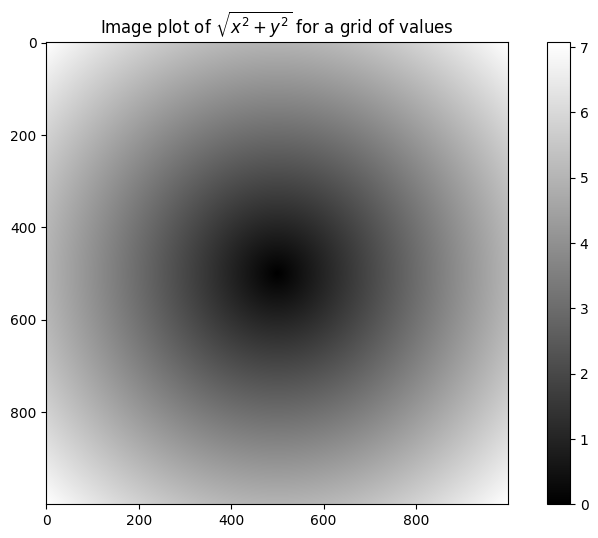

In [174]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap= plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

In [176]:
xarr= np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr= np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond= np.array([True, False, True, True, False])
result= [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result
result1= np.where(cond, xarr, yarr)
result1

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [187]:
arr= np.random.randn(4, 4)
arr
arr>0
np.where(arr>0, 2, -2)
np.where(arr>0, 2, arr)
arr.mean()
np.mean(arr)
arr.sum()
arr.mean(axis= 1)
arr.sum(0)
arr[0]
arr[:,0].sum()

array([[-2.9493,  0.6346,  0.1242,  1.2976],
       [-1.6869,  1.0895,  2.0609, -0.2412],
       [-0.9479,  0.6763, -0.6534, -0.6523],
       [ 0.5288,  0.3578,  0.1886,  0.8694]])

array([[False,  True,  True,  True],
       [False,  True,  True, False],
       [False,  True, False, False],
       [ True,  True,  True,  True]])

array([[-2,  2,  2,  2],
       [-2,  2,  2, -2],
       [-2,  2, -2, -2],
       [ 2,  2,  2,  2]])

array([[-2.9493,  2.    ,  2.    ,  2.    ],
       [-1.6869,  2.    ,  2.    , -0.2412],
       [-0.9479,  2.    , -0.6534, -0.6523],
       [ 2.    ,  2.    ,  2.    ,  2.    ]])

np.float64(0.04354873111301058)

np.float64(0.04354873111301058)

np.float64(0.6967796978081693)

array([-0.2232,  0.3056, -0.3943,  0.4862])

array([-5.0553,  2.7583,  1.7203,  1.2735])

array([-2.9493,  0.6346,  0.1242,  1.2976])

np.float64(-5.0553214854195785)

In [189]:
arr= np.arange(8)
arr
arr.cumsum()

array([0, 1, 2, 3, 4, 5, 6, 7])

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [190]:
arr= np.arange(9).reshape((3, 3))
arr
arr.cumsum(axis= 0)
arr.cumprod(axis= 1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

In [191]:
arr= np.random.randn(100)
(arr>0).sum()
bools= np.array([False, False, True, False])
bools.any()
bools.all()

np.int64(49)

np.True_

np.False_

In [192]:
arr= np.random.randn(6)
arr
arr.sort()
arr

array([-0.2474,  0.3023,  0.544 , -0.9424, -1.2664,  0.9372])

array([-1.2664, -0.9424, -0.2474,  0.3023,  0.544 ,  0.9372])

In [92]:
arr= np.random.randn(5, 3)
arr
arr.sort(1)
arr
arr.sort(0)
arr

array([[-0.6315,  0.3411, -1.607 ],
       [ 0.9975, -0.8245,  0.7154],
       [-1.0133,  0.9976, -0.3257],
       [ 0.1116, -0.4101, -0.546 ],
       [ 0.9972,  0.5815, -0.933 ]])

array([[-1.607 , -0.6315,  0.3411],
       [-0.8245,  0.7154,  0.9975],
       [-1.0133, -0.3257,  0.9976],
       [-0.546 , -0.4101,  0.1116],
       [-0.933 ,  0.5815,  0.9972]])

array([[-1.607 , -0.6315,  0.1116],
       [-1.0133, -0.4101,  0.3411],
       [-0.933 , -0.3257,  0.9972],
       [-0.8245,  0.5815,  0.9975],
       [-0.546 ,  0.7154,  0.9976]])

In [94]:
arr[:, 0].sort()
arr
arr[::-1,:]

array([[-1.607 , -0.6315,  0.1116],
       [-1.0133, -0.4101,  0.3411],
       [-0.933 , -0.3257,  0.9972],
       [-0.8245,  0.5815,  0.9975],
       [-0.546 ,  0.7154,  0.9976]])

array([[-0.546 ,  0.7154,  0.9976],
       [-0.8245,  0.5815,  0.9975],
       [-0.933 , -0.3257,  0.9972],
       [-1.0133, -0.4101,  0.3411],
       [-1.607 , -0.6315,  0.1116]])

In [ ]:
arr= np.random.randn(5)
arr
np.sort(arr)
arr

array([-0.2249,  0.3165,  0.6511, -0.2703,  1.1744])

array([-0.2703, -0.2249,  0.3165,  0.6511,  1.1744])

array([-0.2249,  0.3165,  0.6511, -0.2703,  1.1744])

In [194]:
large_arr= np.random.randn(1000)
large_arr.sort()
int(0.05*len(large_arr))
large_arr[int(0.05*len(large_arr))] #5% quantile

50

np.float64(-1.596128031338419)

In [ ]:
# indirect sorts
values= np.array([5, 0, 1, 3, 2])
indexer= values.argsort() #returns the indices that would sort an array
indexer
values[indexer]

array([1, 2, 4, 3, 0])

array([0, 1, 2, 3, 5])

In [97]:
arr= np.random.randn(3, 5)
arr
arr[0]= values
arr
arr[:, arr[0].argsort()]

array([[-2.632 , -0.0458, -0.2503, -0.2699, -0.2785],
       [ 0.7469, -1.0896, -1.3376,  2.3024,  0.0505],
       [-1.6072, -0.0712,  0.4437,  1.6454, -0.0208]])

array([[ 5.    ,  0.    ,  1.    ,  3.    ,  2.    ],
       [ 0.7469, -1.0896, -1.3376,  2.3024,  0.0505],
       [-1.6072, -0.0712,  0.4437,  1.6454, -0.0208]])

array([[ 0.    ,  1.    ,  2.    ,  3.    ,  5.    ],
       [-1.0896, -1.3376,  0.0505,  2.3024,  0.7469],
       [-0.0712,  0.4437, -0.0208,  1.6454, -1.6072]])

In [ ]:
first_name= np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name= np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter= np.lexsort((first_name, last_name)) #sort by last_name, then first_name
sorter
list(zip(last_name[sorter], first_name[sorter]))

array([1, 2, 3, 0, 4])

[(np.str_('Arnold'), np.str_('Jane')),
 (np.str_('Arnold'), np.str_('Steve')),
 (np.str_('Jones'), np.str_('Bill')),
 (np.str_('Jones'), np.str_('Bob')),
 (np.str_('Walters'), np.str_('Barbara'))]

In [99]:
values= np.array(['2:first', '2:second', '1:first', '1:second', '1:third'])
key= np.array([2, 2, 1, 1, 1])
indexer= key.argsort(kind= 'mergesort') #stable sorting algorithm
indexer
values.take(indexer)

array([2, 3, 4, 0, 1])

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

In [102]:
# partial sorting
from numpy import indices


np.random.seed(12345)
arr= np.random.randn(20)
arr
np.partition(arr, 3) #return a new array with the smallest 3 values on the left and the remaining values on the right
indices= np.argpartition(arr, 3)
indices
arr[indices]

array([-0.2047,  0.4789, -0.5194, -0.5557,  1.9658,  1.3934,  0.0929,
        0.2817,  0.769 ,  1.2464,  1.0072, -1.2962,  0.275 ,  0.2289,
        1.3529,  0.8864, -2.0016, -0.3718,  1.669 , -0.4386])

array([-2.0016, -1.2962, -0.5557, -0.5194, -0.4386, -0.3718, -0.2047,
        0.0929,  0.2289,  0.275 ,  0.2817,  0.4789,  0.769 ,  0.8864,
        1.0072,  1.2464,  1.3529,  1.3934,  1.669 ,  1.9658])

array([16, 11,  3,  2, 19, 17,  0,  6, 13, 12,  7,  1,  8, 15, 10,  9, 14,
        5, 18,  4])

array([-2.0016, -1.2962, -0.5557, -0.5194, -0.4386, -0.3718, -0.2047,
        0.0929,  0.2289,  0.275 ,  0.2817,  0.4789,  0.769 ,  0.8864,
        1.0072,  1.2464,  1.3529,  1.3934,  1.669 ,  1.9658])

In [ ]:
arr= np.array([0, 1, 7, 12, 15])
arr
arr.searchsorted(9)
arr.searchsorted([0, 8, 11, 16]) #return the indices where the values should be inserted to maintain order
arr= np.array([0, 0, 0, 1, 1, 1, 1])
arr.searchsorted([0, 1])
arr.searchsorted([0, 1], side= 'right')

array([ 0,  1,  7, 12, 15])

np.int64(3)

array([0, 3, 3, 5])

array([0, 3])

array([3, 7])

In [108]:
data= np.floor(np.random.uniform(0, 10000, size= 50))
bins= np.array([0, 100, 1000, 5000, 10000])
data
labels= bins.searchsorted(data)
labels
import pandas as pd
pd.Series(data).groupby(labels).mean()

array([8832., 8679., 9557.,    1.,  165., 3140., 9953., 1488., 1673.,
       7585.,  695., 7054., 4691.,  101., 7748., 7942., 1495.,  237.,
       7620., 2236., 2621., 4568., 2499., 5682., 8469., 3780., 4324.,
       8326., 3711.,  405., 5546., 4512., 7253., 3784., 8406., 4693.,
       5626., 6611., 4622., 6236., 2218., 7328., 3816., 1948., 2711.,
       2492., 1521., 7713., 2554., 1275.])

array([4, 4, 4, 1, 2, 3, 4, 3, 3, 4, 2, 4, 3, 2, 4, 4, 3, 2, 4, 3, 3, 3,
       3, 4, 4, 3, 3, 4, 3, 2, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3,
       3, 3, 3, 4, 3, 3])

1       1.0
2     320.6
3    3015.5
4    7608.3
dtype: float64

In [203]:
# advanced use of ufuncs
arr= np.arange(10)
np.add.reduce(arr)
arr.sum()

np.int64(45)

np.int64(45)

In [208]:
np.random.seed(12345)
arr= np.random.randn(5, 5)
arr
arr[::2]
arr[::2].sort(1)
arr[::2]
arr
arr[:, :-1]
arr[:, 1:]
arr[:, :-1] < arr[:, 1:]
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis= 1)

array([[-0.2047,  0.4789, -0.5194, -0.5557,  1.9658],
       [ 1.3934,  0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289,  1.3529],
       [ 0.8864, -2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212, -0.5771]])

array([[-0.2047,  0.4789, -0.5194, -0.5557,  1.9658],
       [ 1.0072, -1.2962,  0.275 ,  0.2289,  1.3529],
       [-0.5397,  0.477 ,  3.2489, -1.0212, -0.5771]])

array([[-0.5557, -0.5194, -0.2047,  0.4789,  1.9658],
       [-1.2962,  0.2289,  0.275 ,  1.0072,  1.3529],
       [-1.0212, -0.5771, -0.5397,  0.477 ,  3.2489]])

array([[-0.5557, -0.5194, -0.2047,  0.4789,  1.9658],
       [ 1.3934,  0.0929,  0.2817,  0.769 ,  1.2464],
       [-1.2962,  0.2289,  0.275 ,  1.0072,  1.3529],
       [ 0.8864, -2.0016, -0.3718,  1.669 , -0.4386],
       [-1.0212, -0.5771, -0.5397,  0.477 ,  3.2489]])

array([[-0.5557, -0.5194, -0.2047,  0.4789],
       [ 1.3934,  0.0929,  0.2817,  0.769 ],
       [-1.2962,  0.2289,  0.275 ,  1.0072],
       [ 0.8864, -2.0016, -0.3718,  1.669 ],
       [-1.0212, -0.5771, -0.5397,  0.477 ]])

array([[-0.5194, -0.2047,  0.4789,  1.9658],
       [ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 0.2289,  0.275 ,  1.0072,  1.3529],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5771, -0.5397,  0.477 ,  3.2489]])

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True],
       [False,  True,  True, False],
       [ True,  True,  True,  True]])

array([ True, False,  True, False,  True])

In [209]:
arr= np.arange(15).reshape((3, 5))
arr
np.add.accumulate(arr, axis= 1)
np.cumsum(arr, axis= 1)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

In [ ]:
arr= np.arange(3).repeat([1, 2, 2])
arr
np.multiply.outer(arr, np.arange(5))
x, y= np.random.randn(3, 4), np.random.randn(5)
result= np.subtract.outer(x, y) #compute the output of all pairs of two different arrays
result.shape
x, y, result

array([0, 1, 1, 2, 2])

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

(3, 4, 5)

(array([[ 0.1241,  0.3026,  0.5238,  0.0009],
        [ 1.3438, -0.7135, -0.8312, -2.3702],
        [-1.8608, -0.8608,  0.5601, -1.2659]]),
 array([ 0.1198, -1.0635,  0.3329, -2.3594, -0.1995]),
 array([[[ 0.0043,  1.1876, -0.2088,  2.4835,  0.3237],
         [ 0.1828,  1.3661, -0.0303,  2.662 ,  0.5022],
         [ 0.4039,  1.5873,  0.1909,  2.8832,  0.7233],
         [-0.1189,  1.0645, -0.3319,  2.3604,  0.2005]],
 
        [[ 1.224 ,  2.4073,  1.0109,  3.7032,  1.5434],
         [-0.8334,  0.35  , -1.0464,  1.6459, -0.514 ],
         [-0.951 ,  0.2324, -1.164 ,  1.5283, -0.6316],
         [-2.4901, -1.3067, -2.7031, -0.0108, -2.1707]],
 
        [[-1.9806, -0.7972, -2.1936,  0.4987, -1.6612],
         [-0.9806,  0.2028, -1.1936,  1.4987, -0.6612],
         [ 0.4403,  1.6237,  0.2273,  2.9196,  0.7597],
         [-1.3858, -0.2024, -1.5988,  1.0935, -1.0664]]]))

In [ ]:
arr= np.arange(10)
arr
np.cumsum(arr)
np.add.reduceat(arr, [0, 5, 8]) #perform a reduce at a set of locations, i.e., add from 0 to 5, then from 5 to 8, then from 8 to the end

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

array([10, 18, 17])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [215]:
arr= np.multiply.outer(np.arange(4), np.arange(5))
arr
np.add.reduceat(arr, [0, 2, 4], axis= 1)

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]])

In [2]:
def add_elements(x, y):
    return x+y

add_them= np.frompyfunc(add_elements, 2, 1) #2 is the number of input arguments, 1 is the number of output arguments
add_them(np.arange(8), np.arange(8))

add_them= np.vectorize(add_elements, otypes= [np.float64])
add_them(np.arange(8), np.arange(8)).dtype

arr= np.random.randn(10000)
%timeit add_them(arr, arr)
%timeit np.add(arr, arr)

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

dtype('float64')

1.5 ms ± 88.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.75 μs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
# numba, a just-in-time compiler for Python that generates optimized machine code using the LLVM compiler infrastructure
import numba as nb
@nb.njit(nogil=True, parallel=True)
def add_elements(x, y):
    return x+y

%timeit add_elements(arr, arr)

The slowest run took 23.28 times longer than the fastest. This could mean that an intermediate result is being cached.
24.5 ms ± 29.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def mean_distance(x, y):
    nx= len(x)
    result= 0.0
    count= 0
    for i in range(nx):
        result+= x[i] - y[i]
        count+= 1
    return result/count

x= np.random.randn(1_000_000)
y= np.random.randn(1_000_000)
%timeit mean_distance(x, y)
%timeit (x-y).mean()

@nb.njit(nb.float64(nb.float64[:], nb.float64[:])) #nb.float64(nb.float64[:], nb.float64[:]) is the signature of the function
def mean_distance_nb(x, y):
    nx= len(x)
    result= 0.0
    count= 0
    for i in range(nx):
        result+= x[i] - y[i]
        count+= 1
    return result/count

%timeit mean_distance_nb(x, y)

269 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.92 ms ± 244 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
895 μs ± 73.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
@nb.vectorize
def nb_add(x, y):
    return x+y

x= np.arange(10)
nb_add(x, x)
nb_add.accumulate(x, 0)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [17]:
# structured and record arrays
dtype= [('x', np.float64), ('y', np.int32)]
sarr= np.array([(1.5, 6), (np.pi, -2)], dtype= dtype)
sarr
sarr[0]
sarr[0]['y']
sarr['x']

array([(1.5   ,  6), (3.1416, -2)], dtype=[('x', '<f8'), ('y', '<i4')])

np.void((1.5, 6), dtype=[('x', '<f8'), ('y', '<i4')])

np.int32(6)

array([1.5   , 3.1416])

In [18]:
dtype= [('x', np.int64, 3), ('y', np.int32)]
arr= np.zeros(4, dtype= dtype)
arr
arr[0]['x']
arr['x']


array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

array([0, 0, 0])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [19]:
dtype= [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data= np.array([((1, 2), 5), ((3, 4), 6)], dtype= dtype)
data['x']
data['y']
data['x']['a']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

array([5, 6], dtype=int32)

array([1., 3.])

In [22]:
# importing and exporting data with ndarray
arr= np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')
np.savez('array_archive.npz', a= arr, b= arr)
arch= np.load('array_archive.npz')
arch
arch['b']
np.savez_compressed('arrays_compressed.npz', a= arr, b= arr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

NpzFile 'array_archive.npz' with keys: a, b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# memory-mapped files
mmap= np.memmap('mymmap', dtype= np.float64, mode= 'w+', shape= (1000, 1000))
mmap

In [25]:
mmap= np.memmap('mymmap', dtype= np.float64, shape= (1000, 1000))
mmap.shape

(1000, 1000)

In [26]:
section= mmap[:5]
section
section.shape

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

(5, 1000)

In [27]:
section[:]= np.random.randn(5, 1000)
mmap.flush()
mmap

memmap([[ 1.4258,  1.8058,  0.5953, ...,  0.178 , -0.2712, -0.2886],
        [ 0.6372, -0.5133, -0.8743, ..., -0.8151, -0.5901, -0.2298],
        [ 0.4239,  0.7458, -0.4502, ...,  0.7304, -0.2638, -0.4736],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [ ]:
del mmap

In [30]:
# contiguity in memory layout
arr_c= np.ones((1000, 1000), order= 'C')
arr_f= np.ones((1000, 1000), order= 'F')
arr_c.flags
arr_f.flags
arr_f.flags.f_contiguous
arr_f.flags.c_contiguous

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

True

False

In [32]:
%timeit arr_c.sum(1)
%timeit arr_f.sum(1)

535 μs ± 50.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
294 μs ± 26.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [34]:
arr_f.copy('C').flags
arr_c[:50].flags.c_contiguous

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

True

In [36]:
arr_c[:, :50].flags.f_contiguous
arr_c[:, :50].flags.c_contiguous

False

False

In [51]:
# peudo-random number generation
samples= np.random.normal(size= (4, 4))
samples

array([[-0.9555, -0.6439, -0.105 ,  0.2567],
       [-2.5403, -0.3154, -0.4802, -1.4015],
       [ 0.9137, -0.146 , -0.2003,  1.7949],
       [-1.208 , -1.4202,  0.565 , -0.5569]])

In [52]:
from random import normalvariate
n= 1000000
%timeit samples= [normalvariate(0, 1) for _ in range(n)]
%timeit np.random.normal(size= n)

478 ms ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.7 ms ± 438 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
# local random number generation
rng= np.random.RandomState(1234) #create a random number generator isolated from others
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

In [54]:
# example: random walk
nsteps= 1000
draws= np.random.randint(0, 2, size= nsteps)
steps= np.where(draws>0, 1, -1)
walk= steps.cumsum()
walk.min()
walk.max()

np.int64(-14)

np.int64(24)

In [60]:
(np.abs(walk)>= 10).argmax() #argmax returns the first index of the maximum value
(walk== -10).argmax()

np.int64(65)

np.int64(65)

In [67]:
nwalks= 5000
nsteps= 1000
draws= np.random.randint(0, 2, size= (nwalks, nsteps))
draws.shape
steps= np.where(draws>0, 1, -1)
steps.shape
walks= steps.cumsum(1)
walks
walks.shape
walks.max()
walks.min()
walks.max(1).shape
walks.max(1).max()

(5000, 1000)

(5000, 1000)

array([[  1,   0,   1, ...,  34,  33,  34],
       [  1,   0,   1, ...,  28,  27,  26],
       [  1,   2,   1, ...,  44,  45,  44],
       ...,
       [ -1,  -2,  -3, ..., -14, -13, -12],
       [  1,   2,   1, ...,  26,  27,  26],
       [ -1,   0,   1, ...,  54,  53,  54]])

(5000, 1000)

np.int64(112)

np.int64(-105)

(5000,)

np.int64(112)

In [86]:
hits30= (np.abs(walks)>= 30).any(1)
hits30.sum()
(np.abs(walks[hits30])>= 30).argmax(1).min()

np.int64(3390)

np.int64(63)